## Sales Prediction for Big Mart Outlets
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

### Data Dictionary
We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.



**Train file: CSV containing the item outlet information with sales value**

* Variable	Description
* Item_Identifier	Unique product ID
* Item_Weight	Weight of product
* Item_Fat_Content	Whether the product is low fat or not
* Item_Visibility	The % of total display area of all products in a store allocated to the particular product
* Item_Type	The category to which the product belongs
* Item_MRP	Maximum Retail Price (list price) of the product
* Outlet_Identifier	Unique store ID
* Outlet_Establishment_Year	The year in which store was established
* Outlet_Size	The size of the store in terms of ground area covered
* Outlet_Location_Type	The type of city in which the store is located
* Outlet_Type	Whether the outlet is just a grocery store or some sort of supermarket
* Item_Outlet_Sales	Sales of the product in the particular store. This is the outcome variable to be predicted.
 

**Test file: CSV containing item outlet combinations for which sales need to be forecasted**

* Variable	Description
* Item_Identifier	Unique product ID
* Item_Weight	Weight of product
* Item_Fat_Content	Whether the product is low fat or not
* Item_Visibility	The % of total display area of all products in a store allocated to the particular product
* Item_Type	The category to which the product belongs
* Item_MRP	Maximum Retail Price (list price) of the product
* Outlet_Identifier	Unique store ID
* Outlet_Establishment_Year	The year in which store was established
* Outlet_Size	The size of the store in terms of ground area covered
* Outlet_Location_Type	The type of city in which the store is located
* Outlet_Type	Whether the outlet is just a grocery store or some sort of supermarket


Submission file format

* Variable	Description
* Item_Identifier	Unique product ID
* Outlet_Identifier	Unique store ID
* **Item_Outlet_Sales	Sales of the product in the particular store. This is the outcome variable to be predicted.**

In [122]:
# Imported Libraries - 
import numpy as np

import pandas as pd

import seaborn as sns

import scipy.stats as stats

import matplotlib.pyplot as plt

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression
#Plotting Parameters
plt.rcParams['figure.figsize'] = [15,8]

In [123]:
train = pd.read_csv('big_mart_train.csv')
test = pd.read_csv('big_mart_test.csv')

In [124]:
train.shape, test.shape

((8523, 12), (5681, 11))

### Exploratory Data Analysis

1. Univariate Analysis

2. Bivariate Analysis

In [125]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


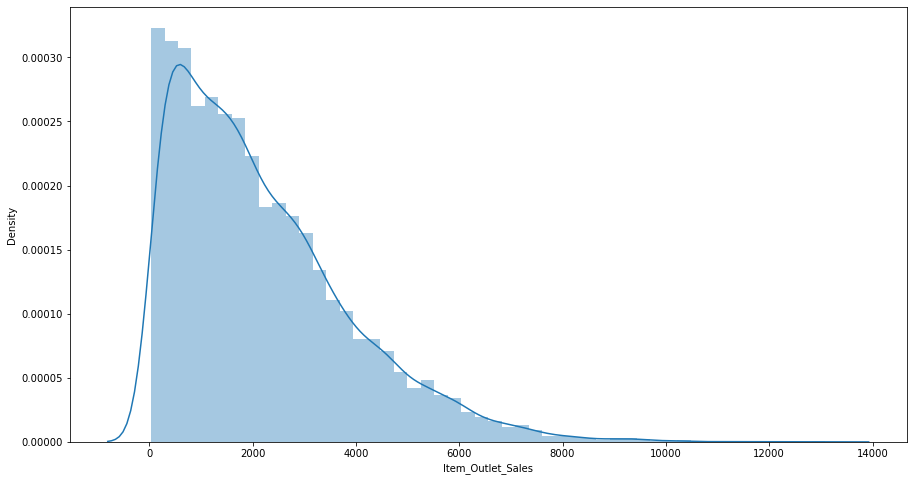

In [126]:
sns.distplot(train.Item_Outlet_Sales)
plt.show()

In [127]:
train.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

### First Submission - Base Model

* Average

In [128]:
train.Item_Outlet_Sales.mean()

2181.2889135750365

In [129]:
# Submission File -

solution = pd.DataFrame({"Item_Identifier":test.Item_Identifier, 
                         "Outlet_Identifier":test.Outlet_Identifier,
                         "Item_Outlet_Sales":train.Item_Outlet_Sales.mean()})

In [130]:
solution.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2181.288914
1,FDW14,OUT017,2181.288914
2,NCN55,OUT010,2181.288914
3,FDQ58,OUT017,2181.288914
4,FDY38,OUT027,2181.288914


In [131]:
# Export to csv - 

solution.to_csv('Basemodel.csv',index=False)

#### Base Model RMSE is : 1773.8251377790564.

In [132]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

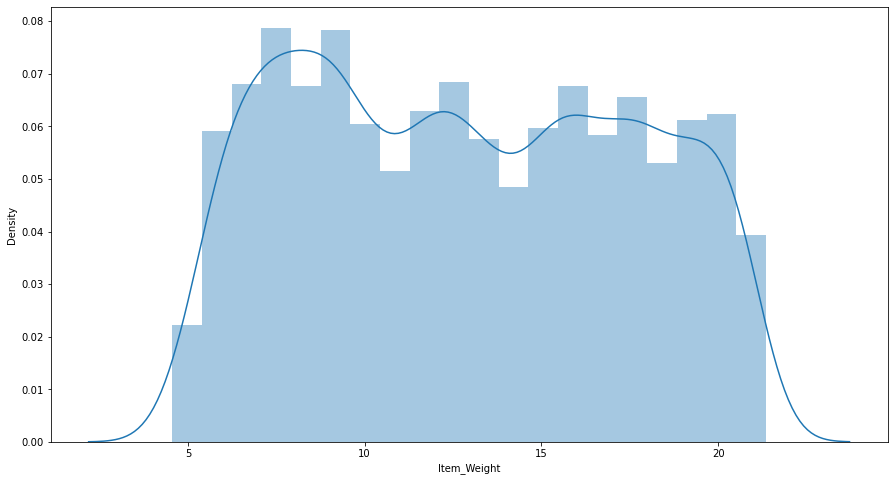

In [133]:
# Item_Weight
sns.distplot(train.Item_Weight)
plt.show()

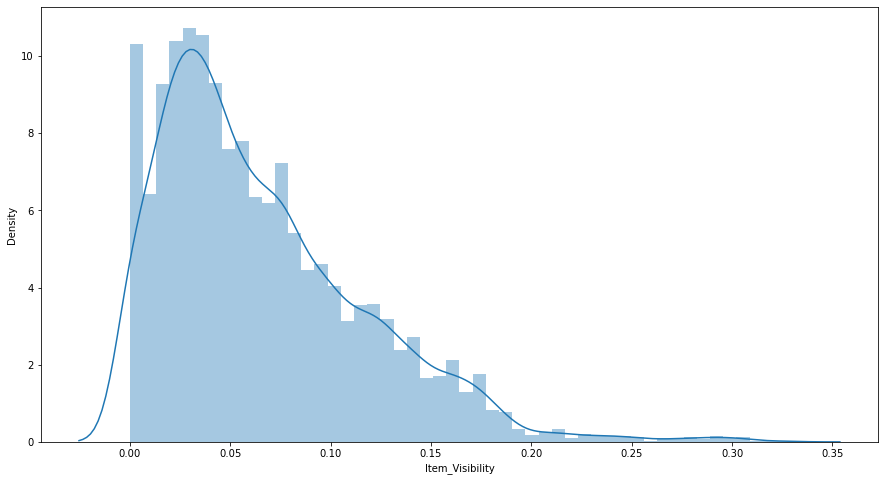

In [134]:
# Item_Visibility
sns.distplot(train.Item_Visibility)
plt.show()

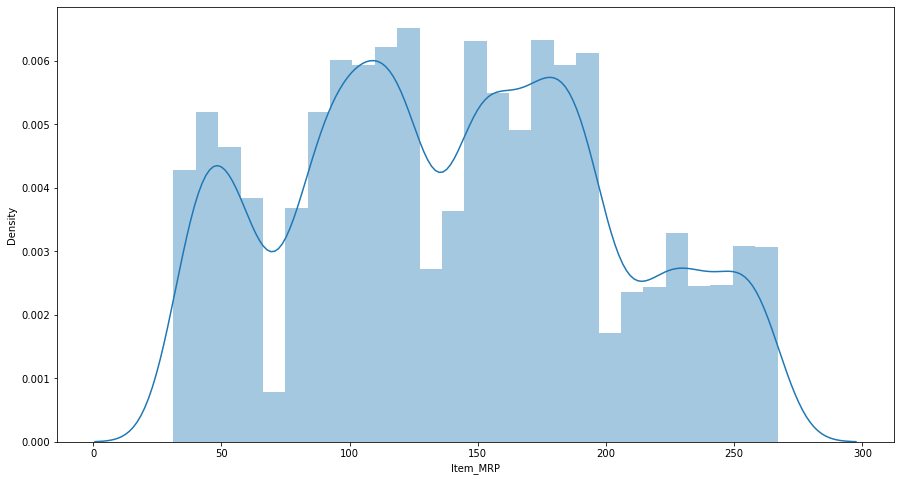

In [135]:
# Item_MRP
sns.distplot(train.Item_MRP)
plt.show()

In [136]:
# Single Category - 
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [137]:
# Fixing the Incorrect naming in the Item_Fat_Content

train.Item_Fat_Content.replace(to_replace=['reg','LF','low fat'],value=['Regular','Low Fat','Low Fat'],inplace=True)

In [138]:
# Fixing the Incorrect naming in the Item_Fat_Content in the Test Data as well
test.Item_Fat_Content.replace(to_replace=['reg','LF','low fat'],value=['Regular','Low Fat','Low Fat'],inplace=True)

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64


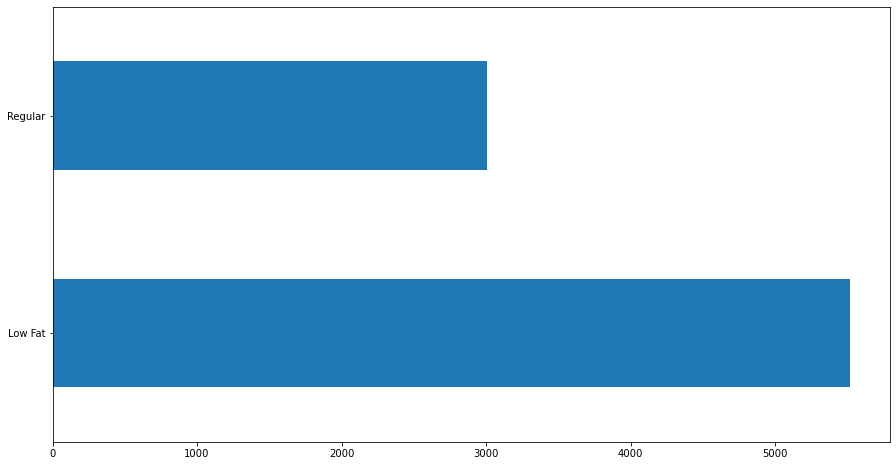

In [139]:
print(train.Item_Fat_Content.value_counts())
print(test.Item_Fat_Content.value_counts())
train.Item_Fat_Content.value_counts().plot(kind='barh')
plt.show()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


<AxesSubplot:>

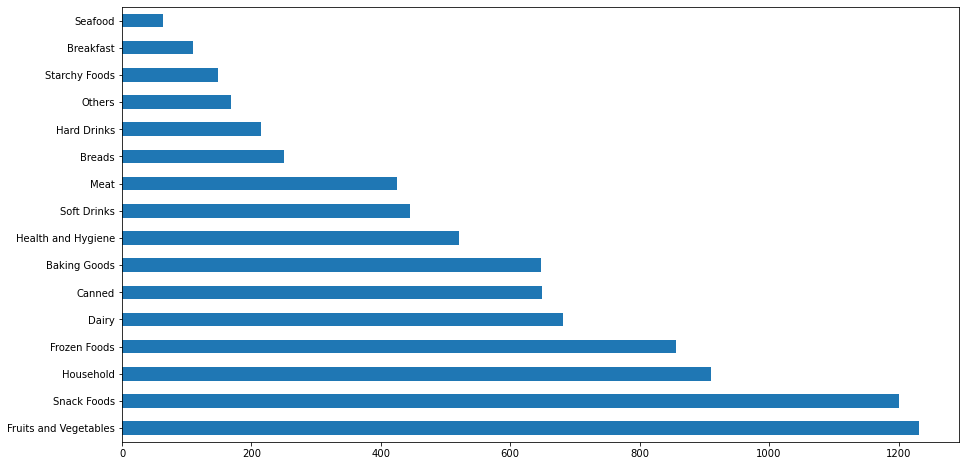

In [140]:
# Item_Type

print(train.Item_Type.value_counts())
train.Item_Type.value_counts().plot(kind='barh')

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


<AxesSubplot:>

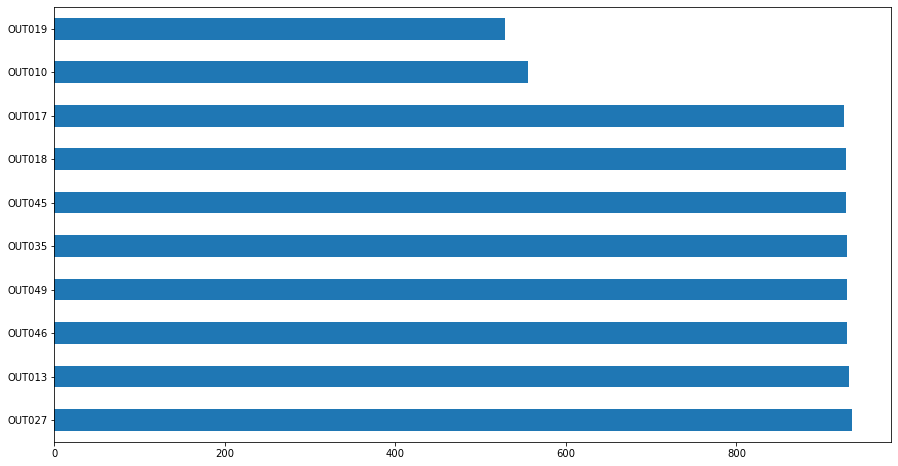

In [141]:
# Outlet_ID
print(train.Outlet_Identifier.value_counts())

# OUT027 has the highes frequency - Sales will also be higher for this outlet
# OUT010 and OUT019 account for the lowest.

train.Outlet_Identifier.value_counts().plot(kind='barh')

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


<AxesSubplot:>

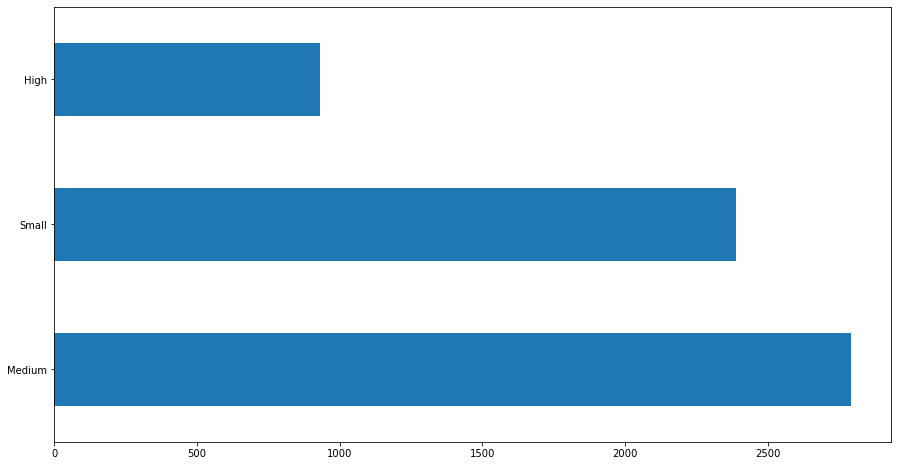

In [142]:
# Outlest_Size -
print(train.Outlet_Size.value_counts())
train.Outlet_Size.value_counts().plot(kind='barh')

### Bivariate Analysis - 

* Num vs Num (Num vs TGT)

* Cat vs Num (Cat vs TGT)

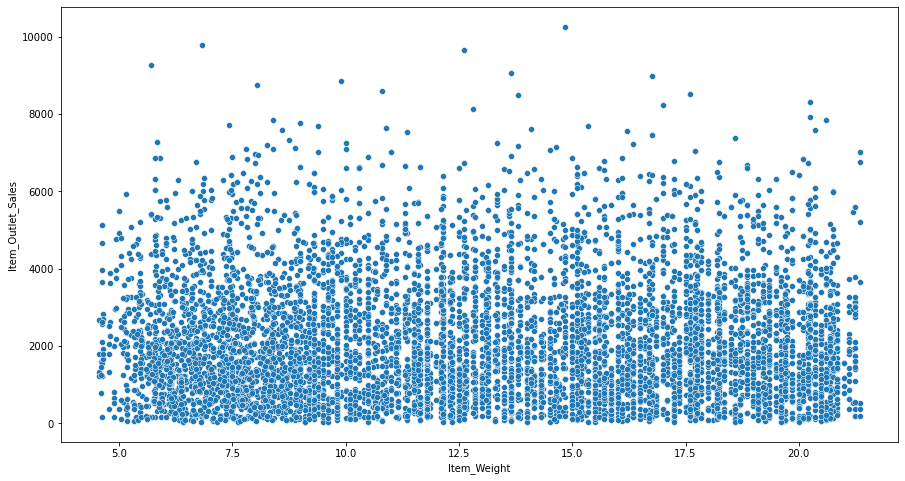

In [143]:
# Item_Weight vs Sales
sns.scatterplot(x = train.Item_Weight, y = train.Item_Outlet_Sales)
plt.show()

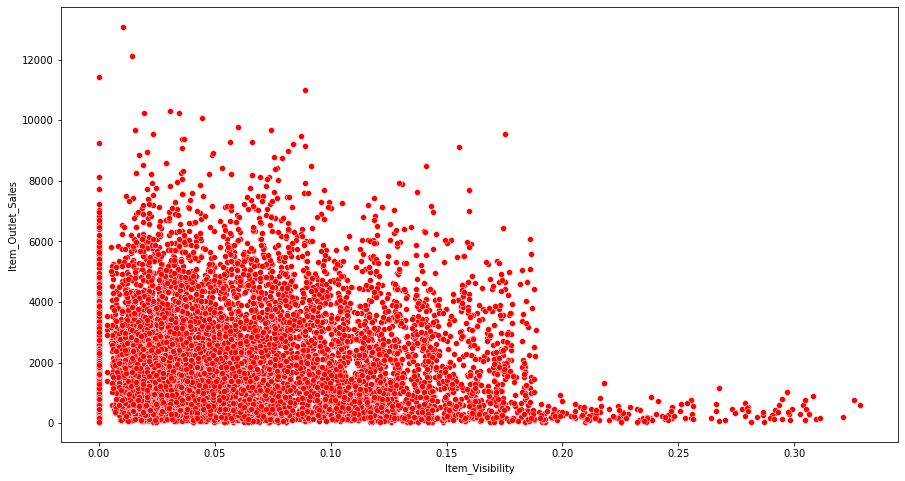

In [144]:
# Item_Visibitly vs Sales
sns.scatterplot(x = train.Item_Visibility, y = train.Item_Outlet_Sales,color='r')
plt.show()

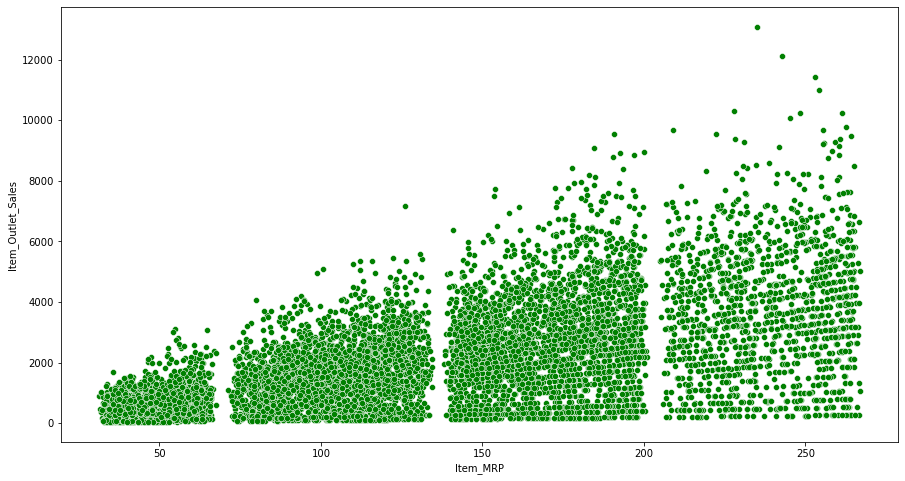

In [145]:
# Item_MRPvs Sales
sns.scatterplot(x = train.Item_MRP, y = train.Item_Outlet_Sales,color='g')
plt.show()

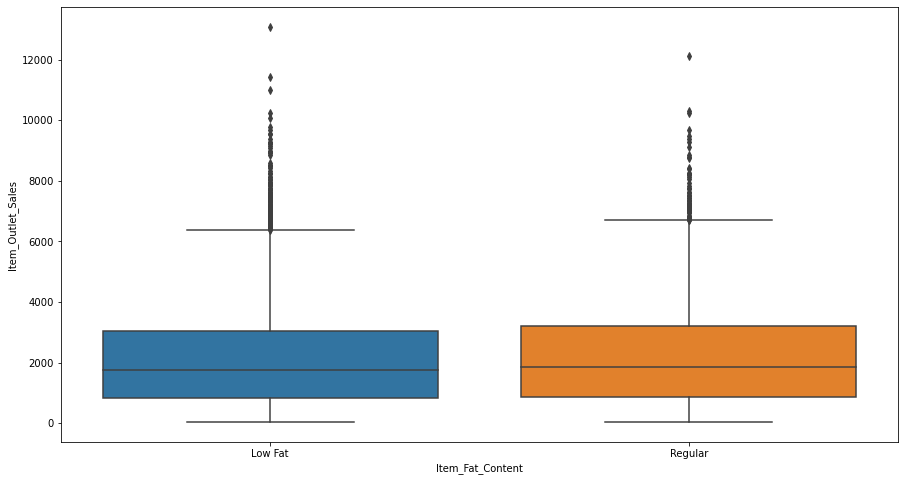

In [146]:
# Cat vs Num - Box Plot

# Item_Fat_Content vs Sales

sns.boxplot(data = train , x = 'Item_Fat_Content',y='Item_Outlet_Sales')
plt.show()

In [147]:
train.groupby('Item_Fat_Content')['Item_Outlet_Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Fat_Content,,,,,,,,
Low Fat,5517.0,2157.711534,1697.973824,33.2900,826.2578,1765.0358,3050.69560,13086.9648
Regular,3006.0,2224.561170,1721.480865,33.9558,857.5504,1844.5989,3198.66965,12117.5600


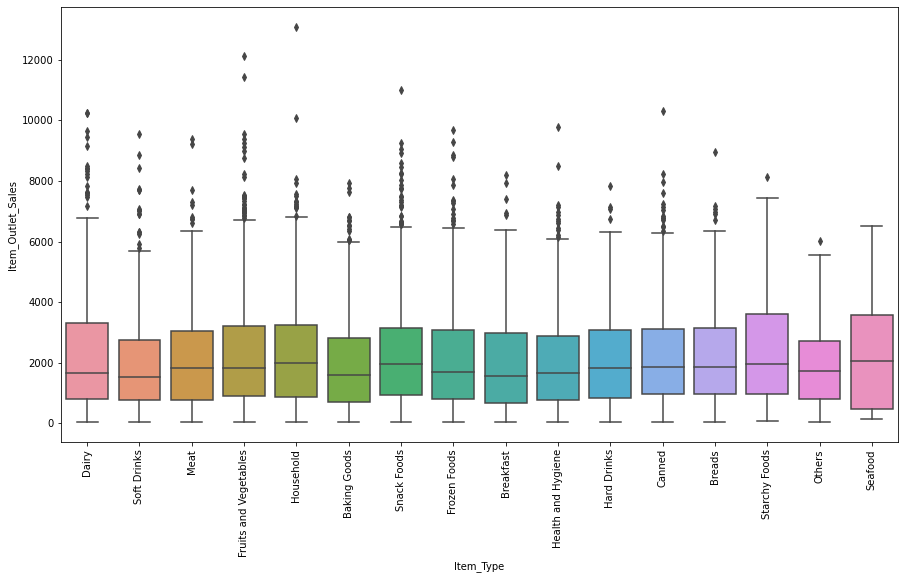

In [148]:
# Item_Type vs Sales 
sns.boxplot(data = train , x = 'Item_Type',y='Item_Outlet_Sales')
plt.xticks(rotation=90)
plt.show()

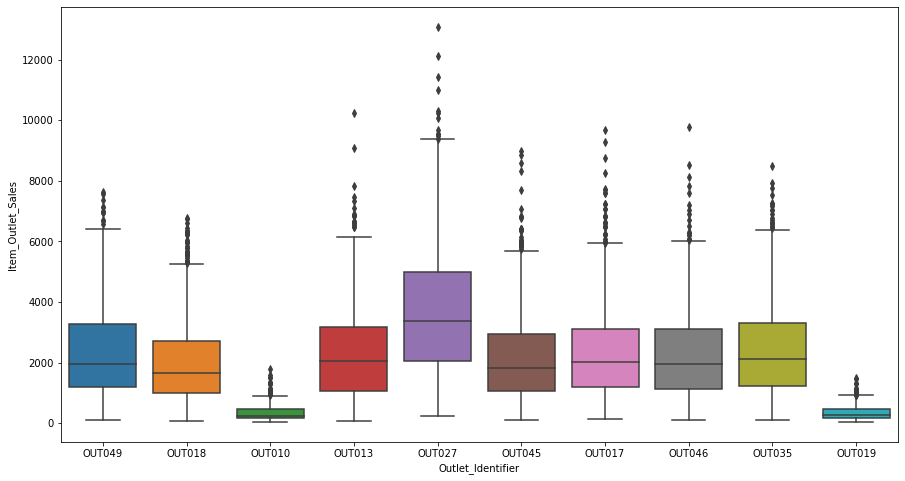

In [149]:
# Outlet_Identifier vs Sales
sns.boxplot(data = train , x = 'Outlet_Identifier',y='Item_Outlet_Sales')
plt.show()
# OUT027 and OUT013 account for high sales, OUT010 and OUT019 have the lowest sales.

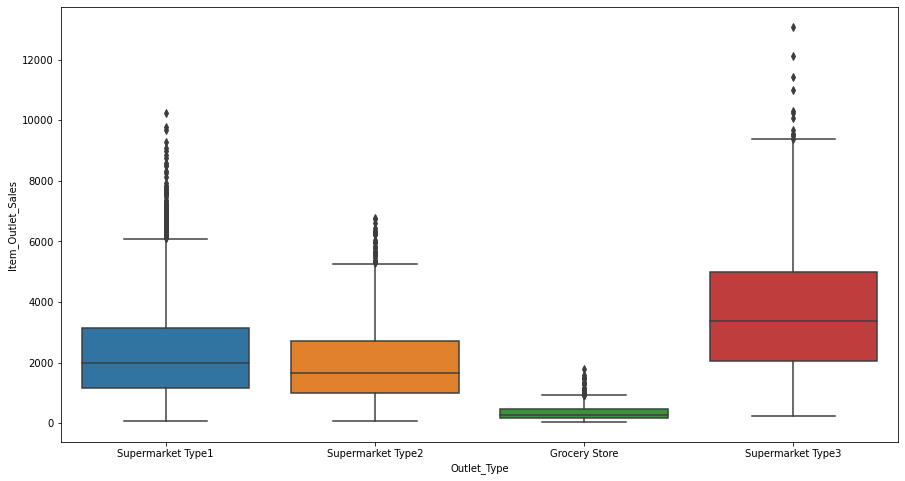

In [150]:
# Outlet_Type vs Sales
sns.boxplot(data = train , x = 'Outlet_Type',y='Item_Outlet_Sales')
plt.show()

### Summary of Bivariate Analysis :
* Low Fat Items sell more than Regular
* No pattern was found between weight and TGT
* We saw interesting pattern between visibility & TGT
* We also saw that there is a straight line at 0 in visibility plot which needs fixing.
* OUT027 & Out013 earns the biggest revenue generator label & Out10 and Out 19 are the slow movers
* S1 and S3 makes lot of money for the business.
* Fast Moving Products are Fruits & Veggies, Snacks, Soft Drinks, Households...

### Missing Values

In [151]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [152]:
# Item_Weight -
# combine train and test 
combined = pd.concat([train,test],ignore_index=True)
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [153]:
combined['Item_Weight'] = combined.groupby('Item_Identifier')['Item_Weight'].transform(lambda x:x.fillna(x.mean()))

In [154]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [155]:
# Outlet_Size - 
combined.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [156]:
combined.groupby('Outlet_Type')['Outlet_Size'].value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small           880
Supermarket Type1  Small          3100
                   High           1553
                   Medium         1550
Supermarket Type2  Medium         1546
Supermarket Type3  Medium         1559
Name: Outlet_Size, dtype: int64

In [157]:
combined.loc[combined.Outlet_Size.isnull(),'Outlet_Identifier'].unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

In [158]:
combined.loc[combined.Outlet_Size.isnull(),'Outlet_Type'].unique()

array(['Grocery Store', 'Supermarket Type1'], dtype=object)

In [159]:
combined.loc[combined.Outlet_Size.isnull(),'Outlet_Location_Type'].unique()

array(['Tier 3', 'Tier 2'], dtype=object)

In [160]:
combined.loc[combined.Outlet_Type=="Grocery Store", "Outlet_Size"] = "Small"
combined.loc[combined.Outlet_Type=="Supermarket Type1", "Outlet_Size"] = "Small"

In [161]:
combined.isnull().sum()
# We have now dealt with all the missing values.

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

## Feature Engineering - 

In [162]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Small,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Small,Tier 3,Supermarket Type1,994.7052


In [163]:
combined.Item_Visibility.describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [164]:
combined['Item_Visibility'] = combined.groupby('Item_Identifier')['Item_Visibility'].transform(lambda x:x.replace(0,x.mean()))

In [165]:
combined.Item_Visibility.describe()

count    14204.000000
mean         0.069710
std          0.049728
min          0.003575
25%          0.031145
50%          0.057194
75%          0.096930
max          0.328391
Name: Item_Visibility, dtype: float64

In [166]:
# Item_Type - 

combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [167]:
perishables = ['Dairy', 'Meat', 'Fruits and Vegetables', 'Baking Goods', 'Frozen Foods',
'Breakfast', 'Canned', 'Breads', 'Starchy Foods', 'Seafood']
def perish(x):
    if x in perishables:
        return('Perishables')
    else:
        return('Non-Perishables')

In [168]:
combined['Item_Type_Cat'] = combined.Item_Type.apply(perish)

In [169]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Cat
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Small,Tier 1,Supermarket Type1,3735.1380,Perishables
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Non-Perishables
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700,Perishables
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Perishables
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,Small,Tier 3,Supermarket Type1,994.7052,Non-Perishables


In [170]:
combined['Vintage'] = 2013 - combined.Outlet_Establishment_Year

In [171]:
# Outlet ID -

def outlets(x):
    if x == 'OUT027':
        return('OUT027')
    else:
        return('Others')
combined['Outlets'] = combined.Outlet_Identifier.apply(outlets)
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Cat,Vintage,Outlets
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Small,Tier 1,Supermarket Type1,3735.1380,Perishables,14,Others
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Non-Perishables,4,Others
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700,Perishables,14,Others
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Perishables,15,Others
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,Small,Tier 3,Supermarket Type1,994.7052,Non-Perishables,26,Others


In [172]:
# Item_Identifier -

combined.iloc[0][0][:2]

'FD'

In [173]:
# Pattern from Item_ID
mylist = []
for i in combined.Item_Identifier:
    mylist.append(i[:2])
    
combined["Item_ID_Cat"] = pd.Series(mylist)

In [174]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Cat,Vintage,Outlets,Item_ID_Cat
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Small,Tier 1,Supermarket Type1,3735.1380,Perishables,14,Others,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Non-Perishables,4,Others,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700,Perishables,14,Others,FD
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Perishables,15,Others,FD
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,Small,Tier 3,Supermarket Type1,994.7052,Non-Perishables,26,Others,NC


In [175]:
# Dropping the Variables - 

df = combined.drop(['Item_Type','Outlet_Establishment_Year','Outlet_Identifier','Item_Identifier'],axis = 1)
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Cat,Vintage,Outlets,Item_ID_Cat
0,9.30,Low Fat,0.016047,249.8092,Small,Tier 1,Supermarket Type1,3735.1380,Perishables,14,Others,FD
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,Non-Perishables,4,Others,DR
2,17.50,Low Fat,0.016760,141.6180,Small,Tier 1,Supermarket Type1,2097.2700,Perishables,14,Others,FD
3,19.20,Regular,0.017834,182.0950,Small,Tier 3,Grocery Store,732.3800,Perishables,15,Others,FD
4,8.93,Low Fat,0.009780,53.8614,Small,Tier 3,Supermarket Type1,994.7052,Non-Perishables,26,Others,NC


In [176]:
# Changing Item_Fat_Content as per Item_ID

df.loc[df.Item_ID_Cat=='NC','Item_Fat_Content'] = 'Non-Edible'
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Cat,Vintage,Outlets,Item_ID_Cat
0,9.30,Low Fat,0.016047,249.8092,Small,Tier 1,Supermarket Type1,3735.1380,Perishables,14,Others,FD
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,Non-Perishables,4,Others,DR
2,17.50,Low Fat,0.016760,141.6180,Small,Tier 1,Supermarket Type1,2097.2700,Perishables,14,Others,FD
3,19.20,Regular,0.017834,182.0950,Small,Tier 3,Grocery Store,732.3800,Perishables,15,Others,FD
4,8.93,Non-Edible,0.009780,53.8614,Small,Tier 3,Supermarket Type1,994.7052,Non-Perishables,26,Others,NC


In [177]:
# Split the Data into Train and Test.
train.shape , test.shape

((8523, 12), (5681, 11))

In [178]:
newtrain = df[:8523]
newtest = df[8523:]
newtrain.shape , newtest.shape

((8523, 12), (5681, 12))

In [179]:
# Reset the Index - 
newtest = newtest.reset_index()
newtest.head()

,index,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Cat,Vintage,Outlets,Item_ID_Cat
0,8523,20.750,Low Fat,0.007565,107.8622,Small,Tier 1,Supermarket Type1,NaN,Non-Perishables,14,Others,FD
1,8524,8.300,Regular,0.038428,87.3198,Small,Tier 2,Supermarket Type1,NaN,Perishables,6,Others,FD
2,8525,14.600,Non-Edible,0.099575,241.7538,Small,Tier 3,Grocery Store,NaN,Non-Perishables,15,Others,NC
3,8526,7.315,Low Fat,0.015388,155.0340,Small,Tier 2,Supermarket Type1,NaN,Non-Perishables,6,Others,FD
4,8527,13.600,Regular,0.118599,234.2300,Medium,Tier 3,Supermarket Type3,NaN,Perishables,28,OUT027,FD


In [180]:
# Drop the Columns - 
newtest = newtest.drop(['index','Item_Outlet_Sales'],axis=1)
newtest.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Cat,Vintage,Outlets,Item_ID_Cat
0,20.750,Low Fat,0.007565,107.8622,Small,Tier 1,Supermarket Type1,Non-Perishables,14,Others,FD
1,8.300,Regular,0.038428,87.3198,Small,Tier 2,Supermarket Type1,Perishables,6,Others,FD
2,14.600,Non-Edible,0.099575,241.7538,Small,Tier 3,Grocery Store,Non-Perishables,15,Others,NC
3,7.315,Low Fat,0.015388,155.0340,Small,Tier 2,Supermarket Type1,Non-Perishables,6,Others,FD
4,13.600,Regular,0.118599,234.2300,Medium,Tier 3,Supermarket Type3,Perishables,28,OUT027,FD


In [181]:
newtest.shape

(5681, 11)

## Model Building - 

In [182]:
dummytrain = pd.get_dummies(newtrain,drop_first=True)
dummytest = pd.get_dummies(newtest,drop_first=True)
dummytrain.shape , dummytest.shape

((8523, 17), (5681, 16))

In [183]:
# Validation Set Comes from Train Set - 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

lr = LinearRegression()

ridge = Ridge(alpha=0.05,normalize=True)
lasso = Lasso(alpha=0.05,normalize=True)

# Define x and y

x = dummytrain.drop('Item_Outlet_Sales',axis = 1)
y = dummytrain.Item_Outlet_Sales

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 1)

def rmse(model, x_train, y_train, x_test,y_test):
    pred_model = model.fit(x_train, y_train).predict(x_test)
    return(np.sqrt(mean_squared_error(y_test,pred_model)))

rmse(lr, xtrain, ytrain, xtest, ytest)

1143.4885858872926

In [184]:
# Building a Final Model - 

pred_reg = lr.fit(x,y).predict(dummytest)

# Submission DataFrame - 

solution = pd.DataFrame({"Item_Identifier":test.Item_Identifier, 
                         "Outlet_Identifier":test.Outlet_Identifier,
                         "Item_Outlet_Sales":pred_reg})

# Export the DF -

solution.to_csv('LRModel.csv',index=False)

In [185]:
solution.Item_Outlet_Sales.describe()

count    5681.000000
mean     2182.052795
std      1275.124298
min     -1395.273069
25%      1344.827314
50%      2144.374570
75%      3052.033316
max      5664.068427
Name: Item_Outlet_Sales, dtype: float64

In [186]:
from sklearn.ensemble import BaggingRegressor
bagg = BaggingRegressor()

pred = bagg.fit(x, y).predict(dummytest)

In [187]:
solution = pd.DataFrame({"Item_Identifier":test.Item_Identifier, 
                         "Outlet_Identifier":test.Outlet_Identifier,
                         "Item_Outlet_Sales":pred})

In [188]:
solution.Item_Outlet_Sales.describe()

count    5681.000000
mean     2216.028292
std      1457.215586
min        41.146440
25%      1058.089360
50%      2037.547740
75%      3100.097960
max      9590.116620
Name: Item_Outlet_Sales, dtype: float64

In [189]:
solution.to_csv("Baggingmodel.csv", index = False) # RMSE: 1280

# Intercept + Slope is showing

<AxesSubplot:>

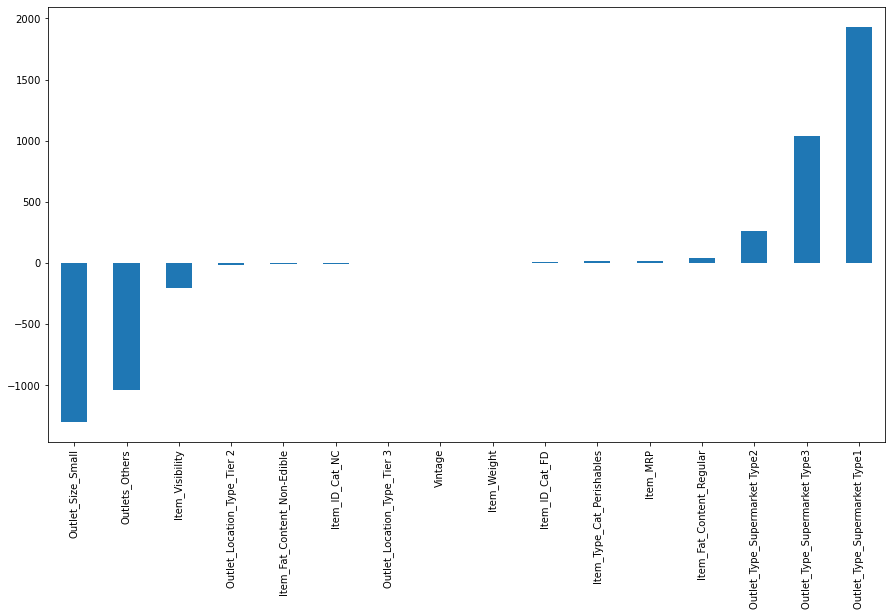

In [190]:
# Regression Coefficient
pd.Series(lr.coef_, x.columns).sort_values().plot(kind = "bar")

### About Regularization

Some Predictors get high weightage in comparison to others. Hence, the model is overfitting when it comes to these features. It is not the correct thing because the model is not giving due importance to the other features and hence we need to introduce **Regularization**


Regularization will introduce a parameter called **alpha**. This is also called as Shrinkage Parameter. It will shrink the Parameters which have very high value and will normalize it.

There are 2 Regularization Techniques which are **L1** and **L2** Regularization and are popularly known as Lasso and Ridge Regression

In [191]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

# predictor and Target

x = dummytrain.drop('Item_Outlet_Sales',axis = 1)
y = dummytrain.Item_Outlet_Sales

# Simple Model to see the effect on Train RMSE vs Test RMSE

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 42)


lasso = Lasso(alpha=1.0,normalize=True)
pred_train = lasso.fit(xtrain,ytrain).predict(xtrain)
pred_test = lasso.fit(xtrain,ytrain).predict(xtest)

print('Train RMSE :',np.sqrt(mean_squared_error(ytrain,pred_train)))
print('Train RMSE :',np.sqrt(mean_squared_error(ytest,pred_test)))

Train RMSE : 1169.5031210990107
Train RMSE : 1090.3083445498125


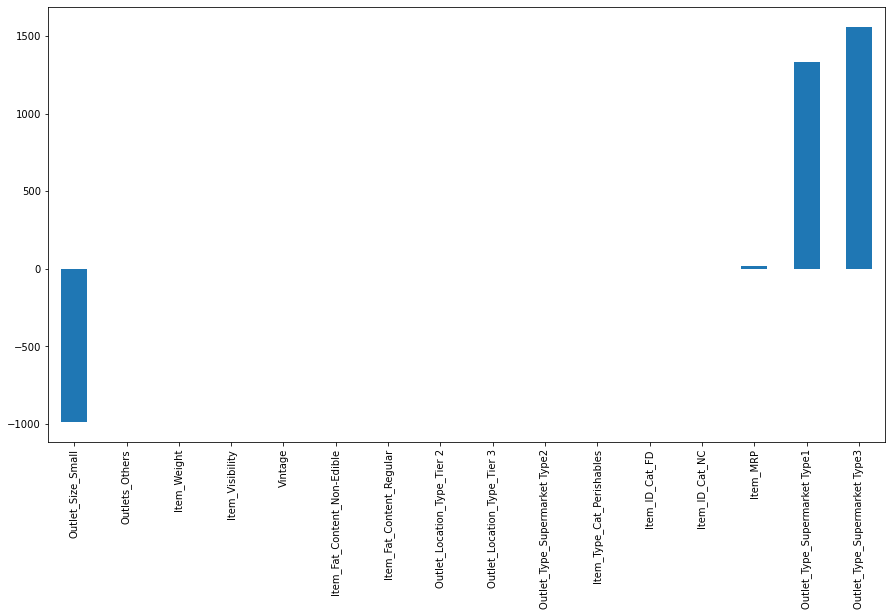

In [192]:
# Plot the coefs - 

pd.Series(lasso.coef_,xtrain.columns).sort_values().plot(kind='bar')
plt.show()

In [193]:
# Function to tell which predictors are 0 basis alpha values- 

def lassos(alphas):
    # create a dataframe
    df = pd.DataFrame()
    df['Features'] = xtrain.columns
    # Loop for all alphas
    for i in alphas:
        lasso = Lasso(alpha=i)
        lasso.fit(xtrain,ytrain)
        col_name = 'Alpha = %f' % i
        df[col_name] = lasso.coef_
    
    return(df)

In [194]:
lassos([0.1,0.01,0.001,0.99,1,2,5,10])

,Features,Alpha = 0.100000,Alpha = 0.010000,Alpha = 0.001000,Alpha = 0.990000,Alpha = 1.000000,Alpha = 2.000000,Alpha = 5.000000,Alpha = 10.000000
0,Item_Weight,-1.229344,-1.252015e+00,-1.254353,-1.049698,-1.049370,-1.016462e+00,-9.199279e-01,-7.557533e-01
1,Item_Visibility,-295.263122,-3.317378e+02,-335.389163,-0.000000,-0.000000,-0.000000e+00,-0.000000e+00,-0.000000e+00
2,Item_MRP,15.638442,1.563793e+01,15.637874,15.642140,15.642135,1.564201e+01,1.564207e+01,1.563848e+01
3,Vintage,-0.748548,-6.724998e-01,-0.664879,-0.813403,-0.816441,-6.262937e-01,-6.071922e-01,-5.843889e-01
4,Item_Fat_Content_Non-Edible,0.000006,5.267061e-08,-41.467678,0.000000,0.000000,-0.000000e+00,-0.000000e+00,-0.000000e+00
5,Item_Fat_Content_Regular,45.060414,4.548480e+01,45.528014,41.288140,41.259322,3.840388e+01,2.958232e+01,8.185023e+00
6,Outlet_Size_Small,-1557.779360,-1.072760e+03,-1024.257741,-1610.304532,-1610.119839,-1.600839e+03,-1.553728e+03,-1.474795e+03
7,Outlet_Location_Type_Tier 2,6.748659,8.010234e+00,8.136841,0.395032,0.305866,0.000000e+00,0.000000e+00,0.000000e+00
8,Outlet_Location_Type_Tier 3,15.160577,1.571173e+01,15.766779,7.065190,6.977870,0.000000e+00,0.000000e+00,0.000000e+00
9,Outlet_Type_Supermarket Type1,1958.692331,1.958853e+03,1958.869691,1955.506318,1955.320012,1.937088e+03,1.885168e+03,1.798500e+03


In [195]:
lassos([1,2,5,10,20,30,50]) # as you introduce more bias the model will lose prediction power.

,Features,Alpha = 1.000000,Alpha = 2.000000,Alpha = 5.000000,Alpha = 10.000000,Alpha = 20.000000,Alpha = 30.000000,Alpha = 50.000000
0,Item_Weight,-1.049370,-1.016462e+00,-9.199279e-01,-7.557533e-01,-3.395153e-01,-0.000000e+00,-0.000000e+00
1,Item_Visibility,-0.000000,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
2,Item_MRP,15.642135,1.564201e+01,1.564207e+01,1.563848e+01,1.563153e+01,1.562485e+01,1.561269e+01
3,Vintage,-0.816441,-6.262937e-01,-6.071922e-01,-5.843889e-01,-5.448509e-01,-4.993521e-01,-4.080031e-01
4,Item_Fat_Content_Non-Edible,0.000000,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
5,Item_Fat_Content_Regular,41.259322,3.840388e+01,2.958232e+01,8.185023e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,Outlet_Size_Small,-1610.119839,-1.600839e+03,-1.553728e+03,-1.474795e+03,-1.316725e+03,-1.158842e+03,-8.429710e+02
7,Outlet_Location_Type_Tier 2,0.305866,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,Outlet_Location_Type_Tier 3,6.977870,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,Outlet_Type_Supermarket Type1,1955.320012,1.937088e+03,1.885168e+03,1.798500e+03,1.624825e+03,1.451141e+03,1.103691e+03


In [196]:
# Finding RMSE and R2 basis different alphas
from sklearn.metrics import r2_score
rmse_train = []
rmse_test = []
r2 = []
al = []
alphas = [0.1,0.01,0.001,0.50,0.99,1,2,5,10,20,30,50]

for i in alphas:
    lasso = Lasso(alpha=i,normalize=True)
    al.append(i)
    pred_tr = lasso.fit(xtrain,ytrain).predict(xtrain)
    pred_test = lasso.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_tr)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
    r2.append(r2_score(ytest,pred_test))

In [197]:
lasso_df = pd.DataFrame({'Aplha':al,'Rsq':r2,'Train_RMSE':rmse_train,'Test_RMSE':rmse_test})
lasso_df

,Aplha,Rsq,Train_RMSE,Test_RMSE
0,0.100,0.580358,1143.932543,1067.976572
1,0.010,0.580023,1143.597409,1068.403188
2,0.001,0.579908,1143.590153,1068.549816
3,0.500,0.576838,1150.402744,1072.446588
4,0.990,0.563020,1169.001815,1089.816070
5,1.000,0.562625,1169.503121,1090.308345
6,2.000,0.500696,1242.768207,1164.943149
7,5.000,0.311961,1438.159537,1367.504685
8,10.000,0.089069,1641.509922,1573.493958
9,20.000,-0.004084,1719.898321,1651.989750


In [198]:
lasso_df.sort_values(by='Rsq',ascending=False)

,Aplha,Rsq,Train_RMSE,Test_RMSE
0,0.100,0.580358,1143.932543,1067.976572
1,0.010,0.580023,1143.597409,1068.403188
2,0.001,0.579908,1143.590153,1068.549816
3,0.500,0.576838,1150.402744,1072.446588
4,0.990,0.563020,1169.001815,1089.816070
5,1.000,0.562625,1169.503121,1090.308345
6,2.000,0.500696,1242.768207,1164.943149
7,5.000,0.311961,1438.159537,1367.504685
8,10.000,0.089069,1641.509922,1573.493958
9,20.000,-0.004084,1719.898321,1651.989750


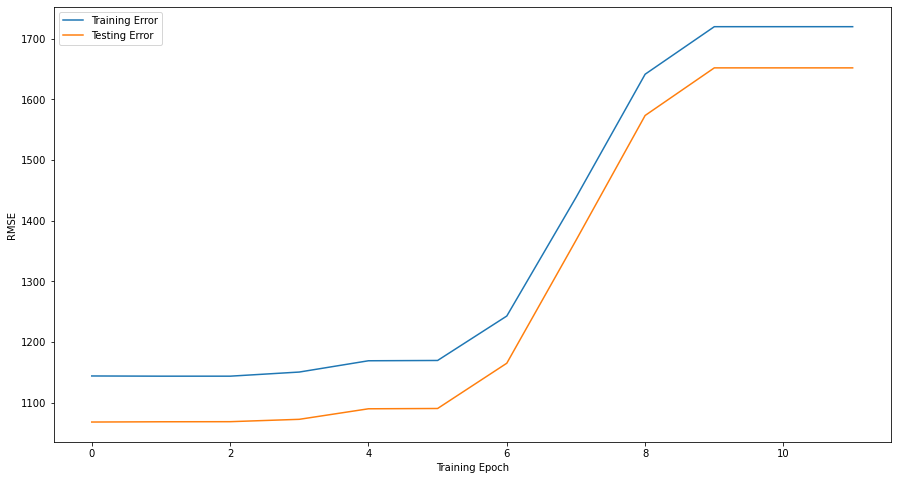

In [199]:
plt.plot(lasso_df.Train_RMSE,label='Training Error')
plt.plot(lasso_df.Test_RMSE,label='Testing Error')
plt.xlabel('Training Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [200]:
lassocv = LassoCV(cv=10,normalize=True,max_iter=1000)
pred_tr = lassocv.fit(xtrain,ytrain).predict(xtrain)
pred_test = lassocv.fit(xtrain,ytrain).predict(xtest)
print('Train Error',np.sqrt(mean_squared_error(ytrain,pred_tr)))
print('Test Error',np.sqrt(mean_squared_error(ytest,pred_test)))

Train Error 1143.8397975273308
Test Error 1067.9830247443208


In [201]:
lassocv.alpha_

0.08306921850519113

In [202]:
lasso = Lasso(alpha=0.09,normalize=True)
lasso.fit(x,y).predict(dummytest)

array([1793.93249351, 1517.20164997, 1953.97054129, ..., 1946.39154722,
       3473.44818554, 1383.94931779])

## Ridge Regression

In [203]:
ridge = Ridge(alpha=1.0,normalize=True)
pred_train = ridge.fit(xtrain,ytrain).predict(xtrain)
pred_test = ridge.fit(xtrain,ytrain).predict(xtest)

print('Train RMSE :',np.sqrt(mean_squared_error(ytrain,pred_train)))
print('Train RMSE :',np.sqrt(mean_squared_error(ytest,pred_test)))

Train RMSE : 1340.0504785791804
Train RMSE : 1262.3961293942516


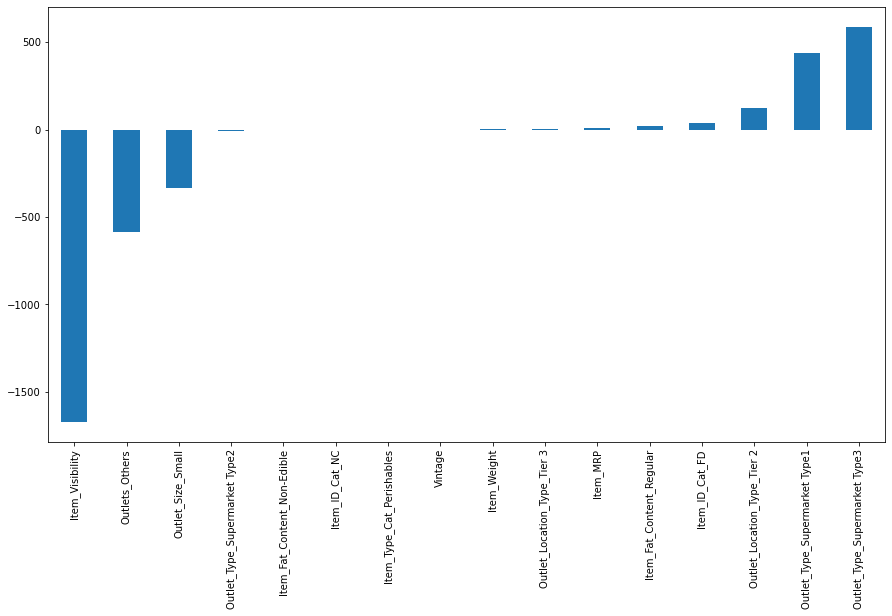

In [204]:
pd.Series(ridge.coef_,xtrain.columns).sort_values().plot(kind='bar')
plt.show()

In [205]:
def ridges(alphas):
    # create a dataframe
    df = pd.DataFrame()
    df['Features'] = xtrain.columns
    # Loop for all alphas
    for i in alphas:
        ridge = Ridge(alpha=i,normalize=True)
        ridge.fit(xtrain,ytrain)
        col_name = 'Alpha = %f' % i
        df[col_name] = ridge.coef_
    
    return(df)

In [206]:
ridges([0.1,0.01,0.001,0.99,1,2,5,10])

,Features,Alpha = 0.100000,Alpha = 0.010000,Alpha = 0.001000,Alpha = 0.990000,Alpha = 1.000000,Alpha = 2.000000,Alpha = 5.000000,Alpha = 10.000000
0,Item_Weight,-0.887513,-1.215760,-1.250643,0.382641,0.386763,0.533450,0.414861,0.266043
1,Item_Visibility,-1132.338360,-448.529186,-347.525081,-1676.253311,-1672.198090,-1288.969570,-719.265404,-409.203757
2,Item_MRP,14.214143,15.482806,15.622226,7.845884,7.806556,5.199349,2.596231,1.414992
3,Vintage,-4.312515,-1.487881,-0.755644,-1.623483,-1.599783,-0.213919,0.559205,0.548300
4,Item_Fat_Content_Non-Edible,6.319643,10.099620,10.534819,-5.502588,-5.538758,-6.842859,-5.540745,-3.728410
5,Item_Fat_Content_Regular,41.378761,45.072512,45.485124,21.733155,21.617234,14.218308,7.242463,4.061597
6,Outlet_Size_Small,-785.890897,-980.449079,-1008.464952,-335.700556,-333.894066,-222.955351,-118.964379,-68.935237
7,Outlet_Location_Type_Tier 2,65.550795,13.698862,8.675132,125.996246,125.629839,91.176553,44.219900,22.291593
8,Outlet_Location_Type_Tier 3,22.821038,18.402250,16.076783,5.489621,5.496594,8.054637,10.748956,9.121286
9,Outlet_Type_Supermarket Type1,1451.849901,1891.911400,1951.947657,441.950937,438.443622,240.630219,96.064556,45.514909


In [207]:
ridges([1,2,5,10,20,30,50]) # as you introduce more bias the model will lose prediction power.

,Features,Alpha = 1.000000,Alpha = 2.000000,Alpha = 5.000000,Alpha = 10.000000,Alpha = 20.000000,Alpha = 30.000000,Alpha = 50.000000
0,Item_Weight,0.386763,0.533450,0.414861,0.266043,0.152011,0.106141,0.066137
1,Item_Visibility,-1672.198090,-1288.969570,-719.265404,-409.203757,-219.157668,-149.587823,-91.481747
2,Item_MRP,7.806556,5.199349,2.596231,1.414992,0.740782,0.501713,0.304906
3,Vintage,-1.599783,-0.213919,0.559205,0.548300,0.379208,0.282043,0.184899
4,Item_Fat_Content_Non-Edible,-5.538758,-6.842859,-5.540745,-3.728410,-2.207194,-1.562860,-0.985660
5,Item_Fat_Content_Regular,21.617234,14.218308,7.242463,4.061597,2.179141,1.491392,0.914908
6,Outlet_Size_Small,-333.894066,-222.955351,-118.964379,-68.935237,-37.864714,-26.160573,-16.182401
7,Outlet_Location_Type_Tier 2,125.629839,91.176553,44.219900,22.291593,10.764229,7.013880,4.107301
8,Outlet_Location_Type_Tier 3,5.496594,8.054637,10.748956,9.121286,6.168594,4.581161,3.005813
9,Outlet_Type_Supermarket Type1,438.443622,240.630219,96.064556,45.514909,21.438381,13.883779,8.100867


In [208]:
# Finding RMSE and R2 basis different alphas
from sklearn.metrics import r2_score
rmse_train = []
rmse_test = []
r2 = []
al = []
alphas = [0.1,0.01,0.001,0.50,0.99,1,2,5,10,20,30,50]

for i in alphas:
    ridge = Ridge(alpha=i,normalize=True)
    al.append(i)
    pred_tr = ridge.fit(xtrain,ytrain).predict(xtrain)
    pred_test = ridge.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_tr)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
    r2.append(r2_score(ytest,pred_test))

In [209]:
ridge_df = pd.DataFrame({'Aplha':al,'Rsq':r2,'Train_RMSE':rmse_train,'Test_RMSE':rmse_test})
ridge_df

,Aplha,Rsq,Train_RMSE,Test_RMSE
0,0.100,0.572487,1156.960564,1077.945528
1,0.010,0.580265,1143.802596,1068.094873
2,0.001,0.579948,1143.592331,1068.498101
3,0.500,0.495447,1250.724958,1171.050294
4,0.990,0.415067,1338.576459,1260.884574
5,1.000,0.413664,1340.050479,1262.396129
6,2.000,0.307774,1446.482607,1371.659053
7,5.000,0.172786,1570.934995,1499.447391
8,10.000,0.099098,1634.673494,1564.808425
9,20.000,0.052385,1673.791548,1604.864178


In [210]:
ridge_df.sort_values(by='Rsq',ascending=False)

,Aplha,Rsq,Train_RMSE,Test_RMSE
1,0.010,0.580265,1143.802596,1068.094873
2,0.001,0.579948,1143.592331,1068.498101
0,0.100,0.572487,1156.960564,1077.945528
3,0.500,0.495447,1250.724958,1171.050294
4,0.990,0.415067,1338.576459,1260.884574
5,1.000,0.413664,1340.050479,1262.396129
6,2.000,0.307774,1446.482607,1371.659053
7,5.000,0.172786,1570.934995,1499.447391
8,10.000,0.099098,1634.673494,1564.808425
9,20.000,0.052385,1673.791548,1604.864178


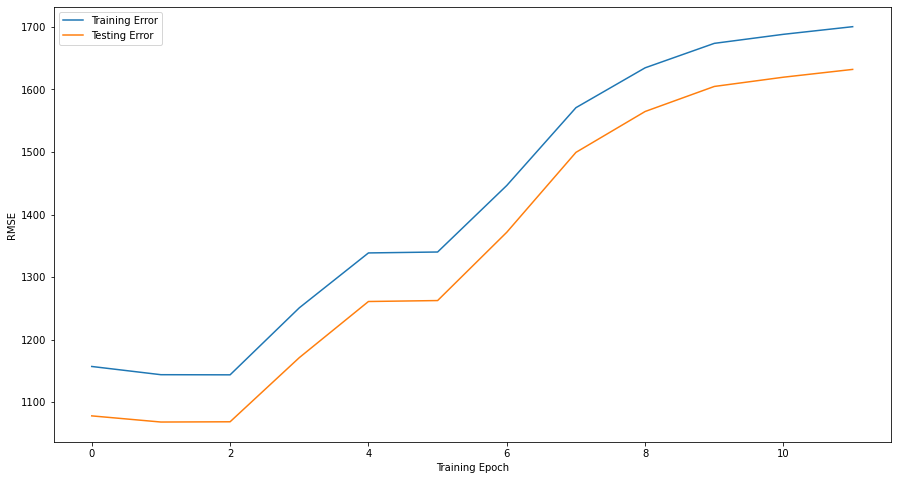

In [211]:
plt.plot(ridge_df.Train_RMSE,label='Training Error')
plt.plot(ridge_df.Test_RMSE,label='Testing Error')
plt.xlabel('Training Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [212]:
ridgecv = RidgeCV(cv=10,normalize=True)
pred_tr = ridgecv.fit(xtrain,ytrain).predict(xtrain)
pred_test = ridgecv.fit(xtrain,ytrain).predict(xtest)
print('Train Error',np.sqrt(mean_squared_error(ytrain,pred_tr)))
print('Test Error',np.sqrt(mean_squared_error(ytest,pred_test)))

Train Error 1156.96056432569
Test Error 1077.94552791252


In [213]:
ridgecv.alpha_

0.1

In [214]:
ridge = Ridge(alpha=0.10,normalize=True)
ridge.fit(x,y).predict(dummytest)

array([1818.253219  , 1636.63788678, 2142.99102977, ..., 1934.88821948,
       3391.01733436, 1434.56866319])

## Elastic Net

In [215]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=0.10,normalize=True,max_iter=1000)
pred_tr = enet.fit(xtrain,ytrain).predict(xtrain)
pred_test = enet.fit(xtrain,ytrain).predict(xtest)
print('Train Error',np.sqrt(mean_squared_error(ytrain,pred_tr)))
print('Test Error',np.sqrt(mean_squared_error(ytest,pred_test)))

Train Error 1716.9748466838946
Test Error 1649.005574554894


In [216]:
enet = ElasticNet(alpha=0.00001,normalize=True,max_iter=1000)
pred_tr = enet.fit(xtrain,ytrain).predict(xtrain)
pred_test = enet.fit(xtrain,ytrain).predict(xtest)
print('Train Error',np.sqrt(mean_squared_error(ytrain,pred_tr)))
print('Test Error',np.sqrt(mean_squared_error(ytest,pred_test)))

Train Error 1145.7343083986925
Test Error 1068.7246550980828


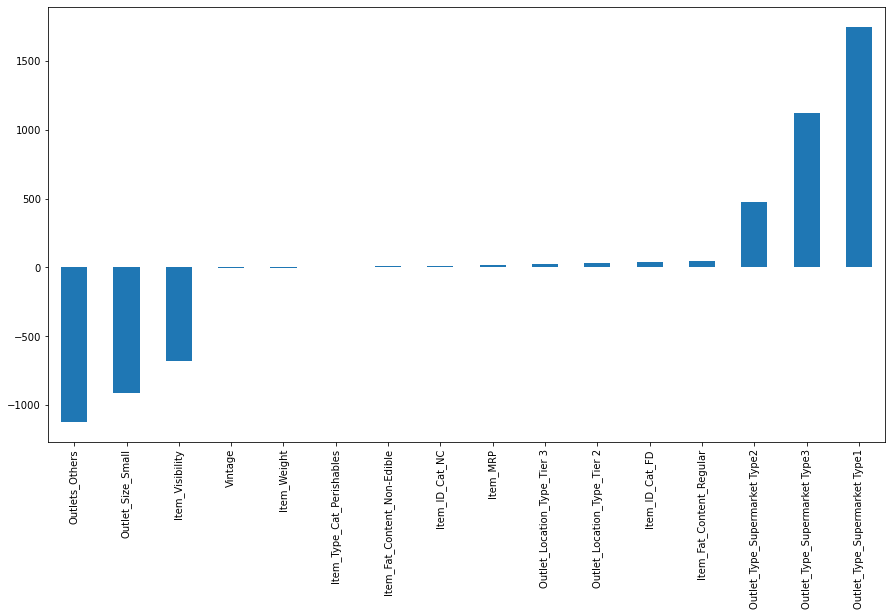

In [217]:
pd.Series(enet.coef_,xtrain.columns).sort_values().plot(kind='bar')
plt.show()